In [1]:
import itertools
import random
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Erdos Renyi

In [2]:
help(nx.erdos_renyi_graph)

Help on function gnp_random_graph in module networkx.generators.random_graphs:

gnp_random_graph(n, p, seed=None, directed=False)
    Returns a `G_{n,p}` random graph, also known as an Erdős-Rényi graph or
    a binomial graph.
    
    The `G_{n,p}` model chooses each of the possible edges with probability
    ``p``.
    
    The functions :func:`binomial_graph` and :func:`erdos_renyi_graph` are
    aliases of this function.
    
    Parameters
    ----------
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
    seed : int, optional
        Seed for random number generator (default=None).
    directed : bool, optional (default=False)
        If ``True``, this function returns a directed graph.
    
    See Also
    --------
    fast_gnp_random_graph
    
    Notes
    -----
    This algorithm runs in `O(n^2)` time.  For sparse graphs (that is, for
    small values of `p`), :func:`fast_gnp_random_graph` is a faster algorithm.
    
    Referen

In [3]:
def erdos_renyi_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes(), 2)
    
    G.add_edges_from([edge for edge in possible_edges if random.random() < p])
    
    return G

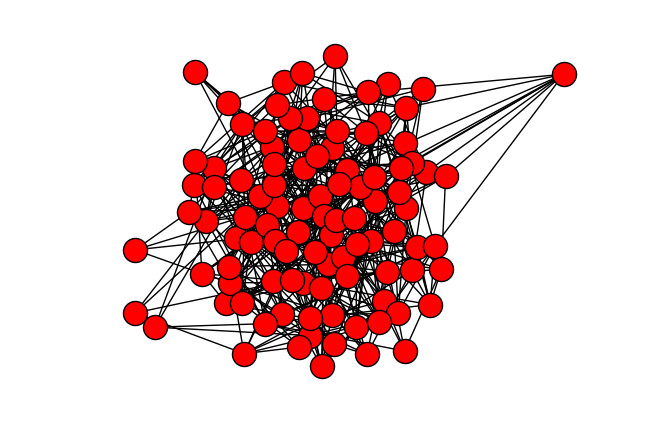

In [4]:
G= erdos_renyi_graph(100,  .1)
nx.draw(G)

# Degree Distribution

In [5]:
N = 1000
p = 0.1
G = erdos_renyi_graph(N, p)

In [6]:
from collections import Counter
degree_count = Counter(G.degree().values())

<Container object of 56 artists>

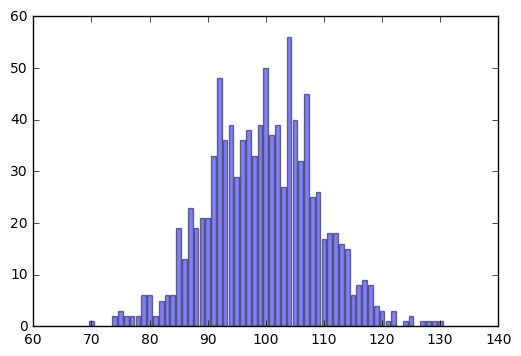

In [7]:
degrees = list(degree_count.keys())
counts = list(degree_count.values())

plt.bar(degrees, counts, align ='center', alpha=0.5)

In [8]:
import math
def nCr(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

def binomial(n, k, p):
    return nCr(n, k) * p**k * (1-p)**(n-k)

In [9]:
nCr(10, 3)

120

In [10]:
binomial(N-1, 10, p) * N

1.4524746578285143e-29

In [11]:
degree_range = range(min(degrees), max(degrees) + 1)
expected_counts = [binomial(N-1, k, p) * N for k in degree_range]

In [12]:
expected_counts

[0.20294067253634923,
 0.2950420732179475,
 0.42252938880594954,
 0.596171603383737,
 0.8289112683683793,
 1.1359154418381494,
 1.5344822635357458,
 2.043762091260452,
 2.684257333535807,
 3.4770759552552444,
 4.44293038727059,
 5.600895783129865,
 6.966967925356663,
 8.552489407700216,
 10.362540075996554,
 12.394410679133134,
 14.63629374771019,
 17.066329746691448,
 19.65213728406894,
 22.350932666400503,
 25.110307069659832,
 27.86968147291915,
 30.56240432054419,
 33.118399902907505,
 35.46722259105698,
 37.54132917532931,
 39.279353674187156,
 40.62915964237228,
 41.550455779387526,
 42.016790861086605,
 42.016790861086605,
 41.554559938522395,
 40.64923183528661,
 39.33372271440355,
 37.6527943932752,
 35.66058304971566,
 33.41777908432474,
 30.988657032504676,
 28.438150280858192,
 25.82914566793543,
 23.220141055012657,
 20.66336876667292,
 18.20344391349758,
 15.87655334441726,
 13.710162049857397,
 11.723182042631688,
 9.92652579088737,
 8.323952776214194,
 6.91311332261857,

<Container object of 61 artists>

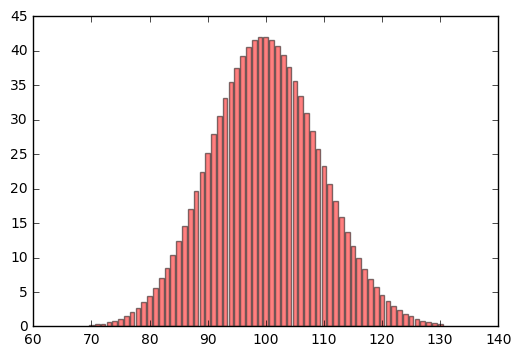

In [13]:
plt.bar(degree_range, expected_counts, align ='center', alpha=0.5, color='red')
#plt.xlim(-1)

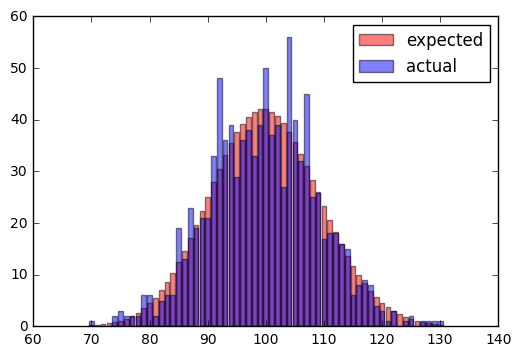

In [14]:
ax = plt.subplot(111)
ax.bar(degree_range, expected_counts, align ='center', alpha=0.5, color='red', label='expected')
ax.bar(degrees, counts, align ='center', alpha=0.5, label='actual')
ax.legend()
#plt.xlim(-1)

<Container object of 61 artists>

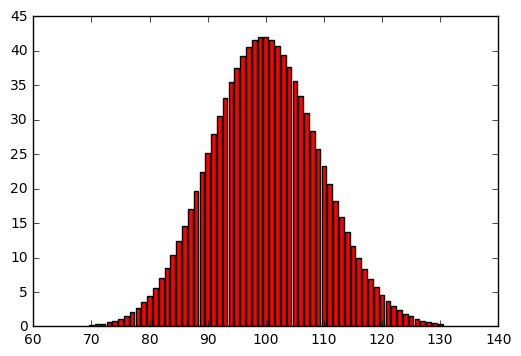

In [15]:
#Start with discussion of plotting f(x) vs x

def f(k):
    return binomial(N-1, k, p) * N

expected_counts = [f(k) for k in degree_range]
plt.bar(degree_range, expected_counts, align='center', color='red')

In [16]:
from collections import Counter

def degree_histogram(G, plot_type='bar', **kwargs):
    degree_count = Counter(G.degree().values())
    degrees = list(degree_count.keys())
    counts = list(degree_count.values())
    
    if plot_type == 'bar':
        plt.bar(degrees, counts, align='center', **kwargs)
    else:
        plt.scatter(degrees, counts, **kwargs)

(0, 60.0)

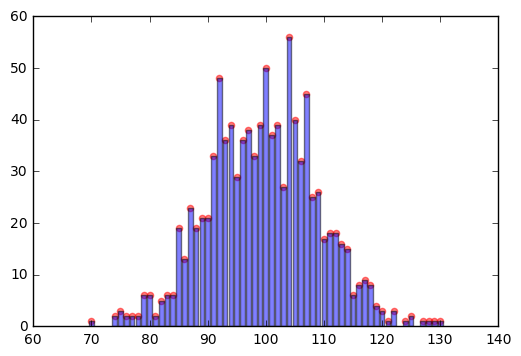

In [21]:
degree_histogram(G, plot_type='scatter', alpha=0.5, color='red')
degree_histogram(G, alpha=0.5)
plt.ylim(0)

# WS small-world

In [22]:
help(nx.watts_strogatz_graph)

Help on function watts_strogatz_graph in module networkx.generators.random_graphs:

watts_strogatz_graph(n, k, p, seed=None)
    Return a Watts–Strogatz small-world graph.
    
    Parameters
    ----------
    n : int
        The number of nodes
    k : int
        Each node is joined with its ``k`` nearest neighbors in a ring
        topology.
    p : float
        The probability of rewiring each edge
    seed : int, optional
        Seed for random number generator (default=None)
    
    See Also
    --------
    newman_watts_strogatz_graph()
    connected_watts_strogatz_graph()
    
    Notes
    -----
    First create a ring over ``n`` nodes.  Then each node in the ring is joined
    to its ``k`` nearest neighbors (or ``k - 1`` neighbors if ``k`` is odd).
    Then shortcuts are created by replacing some edges as follows: for each
    edge ``(u, v)`` in the underlying "``n``-ring with ``k`` nearest neighbors"
    with probability ``p`` replace it with a new edge ``(u, w)`` with u

In [31]:
def ring_graph(N, k):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for n in range(N):
        neighbors_on_each_side = k // 2
        neighbor_range = range(n - neighbors_on_each_side, n + neighbors_on_each_side + 1)
        for m in neighbor_range:
            if n != m:
                G.add_edge(n, m % N)
    return G

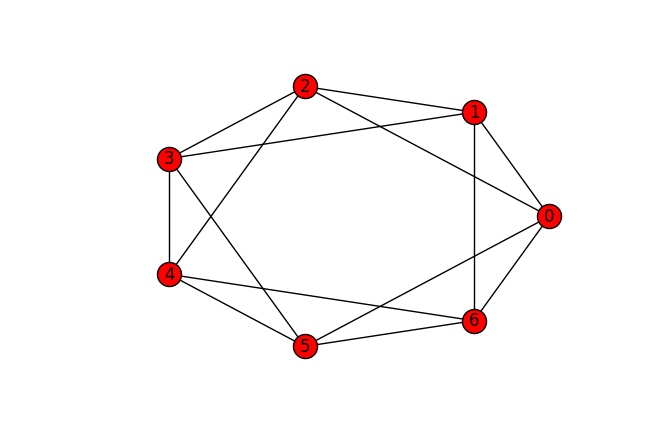

In [50]:
nx.draw_circular(ring_graph(7, 4), with_labels=True)

In [51]:
def watts_strogatz_graph(N, k, p):
    G = ring_graph(N, k)
    edges_to_rewire = []
    for edge in G.edges_iter():
        if random.random() < p:
            edges_to_rewire.append(edge)
    #edges_to_rewire = [e for e in G.edges_iter() if random.random() < p]
    possible_edges = list(itertools.combinations(G.nodes_iter(), 2))
    for a, b in edges_to_rewire:
        new_edge = random.choice(possible_edges)
        G.remove_edge(a, b)
        G.add_edge(*new_edge)
        
    return G

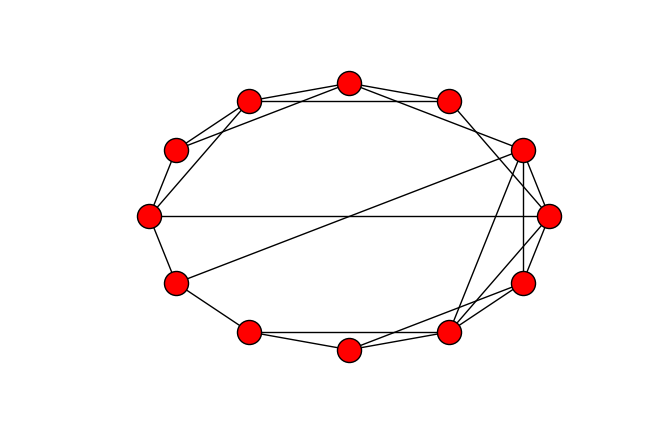

In [52]:
H = watts_strogatz_graph(12, 4, .1)

nx.draw_circular(H)

In [48]:
def random_possible_pair(seq):
    seq_set = set(seq)
    a = random.choice(seq_set)
    seq_set.remove(a)
    b = random.choice(seq_set)
    return (a, b)

random_possible_pair(G.nodes())

TypeError: 'set' object does not support indexing

In [49]:
def random_possible_pair(seq):
    seq_list = list(seq)
    idx = random.randrange(len(seq_list))
    a = seq_list.pop(idx)
    b = random.choice(seq_list)
    
    return (a, b)

random_possible_pair(G.nodes())

(729, 792)

In [53]:
def watts_strogatz_graph(N, k, p):
    G = ring_graph(N, k)
    
    edges_to_rewire = []
    for edge in G.edges_iter():
        if random.random() < p:
            edges_to_rewire.append(edge)
    #edges_to_rewire = [e for e in G.edges_iter() if random.random() < p]
    for a, b in edges_to_rewire:
        new_edge = random_possible_pair(G.nodes_iter())
        G.remove_edge(a, b)
        G.add_edge(*new_edge)
        
    return G

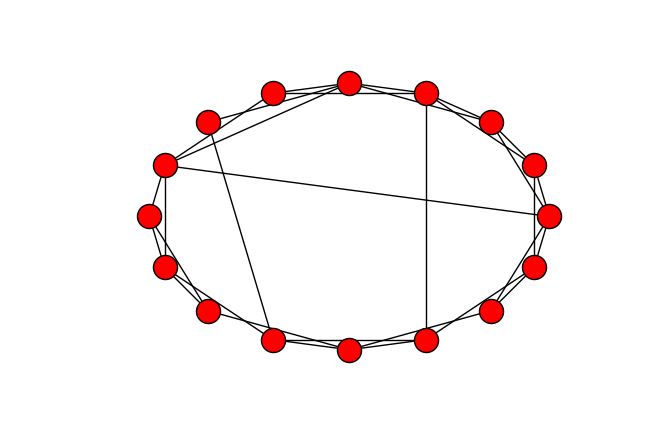

In [54]:
G = watts_strogatz_graph(16,4, .1)
nx.draw_circular(G)

# Barabasi-Alberts (preferential attachment)

In [56]:
help(nx.barabasi_albert_graph)

Help on function barabasi_albert_graph in module networkx.generators.random_graphs:

barabasi_albert_graph(n, m, seed=None)
    Returns a random graph according to the Barabási–Albert preferential
    attachment model.
    
    A graph of ``n`` nodes is grown by attaching new nodes each with ``m``
    edges that are preferentially attached to existing nodes with high degree.
    
    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : int, optional
        Seed for random number generator (default=None).
    
    Returns
    -------
    G : Graph
    
    Raises
    ------
    NetworkXError
        If ``m`` does not satisfy ``1 <= m < n``.
    
    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.



In [61]:
def barabasi_albert_graph(N, M):
    if not (1 <= M < N):
        raise nx.NetworkXError('M must satisfy ``1 <= m < n``')
        
    #Initial condition -- dyad
    G = nx.Graph()
    G.add_edge(0, 1)
    endpoints = [0, 1]
    
    for n in range(2, N):
        G.add_node(n)
        
        if len(G) <= M:
            neighbors = G.nodes()
        else:
            neighbors = set()
            while len(neighbors) < M:
                neighbors.add(random.choice(endpoints))
                
        for m in neighbors:
            G.add_edge(n, m)
            endpoints.extend([n, m])
            
    return G

In [69]:
G = barabasi_albert_graph(10000, 4)
#nx.draw(G)

[]

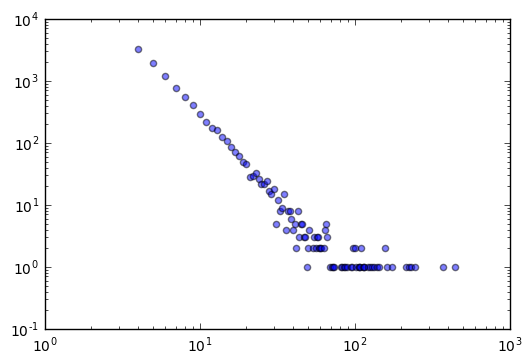

In [70]:
degree_histogram(G, plot_type='scatter', alpha=0.5)
plt.loglog()